# Practice of using descriptive statistics
- ploted Probability Density Function(pdf) and Cumulative distribution function(cdf) 
- canculated
  - mean
  - median
  - mode
  - quantiles
  - interquartile range
  - sample varience
  - standard deviation
  
for random and real data

# Creating normal destibuted data

In [142]:
import numpy as np
rs = np.random.RandomState(10)
x = rs.normal(size=100)
print(x[:10])

[ 1.3315865   0.71527897 -1.54540029 -0.00838385  0.62133597 -0.72008556
  0.26551159  0.10854853  0.00429143 -0.17460021]


## Building histogram 

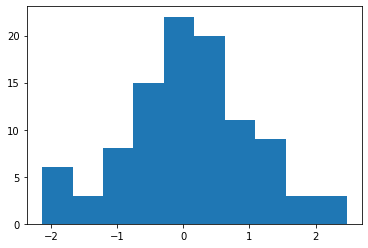

In [149]:
import matplotlib.pyplot as plt
plt.hist(x)
plt.show()

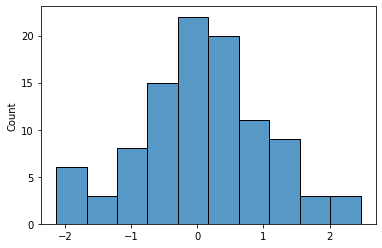

In [150]:
import seaborn as sb
sb.histplot(x, bins=10)
plt.show()

## Building smoothing probability distribution function by Gaussian kernel

<AxesSubplot:ylabel='Density'>

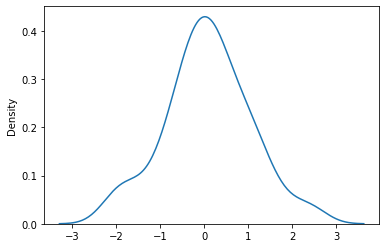

In [170]:
sb.kdeplot(x, bw_adjust=1)

## Building empirical distribution function ( estimation of theoretical cumulative df)

In [151]:
a = np.arange(-3, 3, 0.3)
f = []
for ai in a:
    f.append(len([1 for i in x if i < ai])) 
     #print(len([1 for i in x if i < ai]))

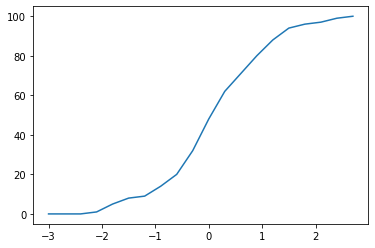

In [169]:
plt.plot(a, f)
plt.show()

## Building smoothing empirical distribution function by Gaussian kernel

<AxesSubplot:ylabel='Density'>

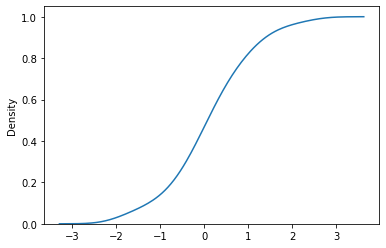

In [158]:
sb.kdeplot(data=x,cumulative=True)

# Loading real data. For example spotify data 

In [160]:
import pandas as pd
spotify_data = pd.read_csv(r'C:\Users\user\Jupyter\gl-ml-basecamp\HW-3\spotify_data.csv')

In [161]:
spotify_data.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.991000,['Mamie Smith'],0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,1920,0.0936,149.976,0.6340,1920
1,0.643000,"[""Screamin' Jay Hawkins""]",0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7,1920-01-05,0.0534,86.889,0.9500,1920
2,0.993000,['Mamie Smith'],0.647,163827,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,1,Golfing Papa,4,1920,0.1740,97.600,0.6890,1920
3,0.000173,['Oscar Velazquez'],0.730,422087,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,1920-01-01,0.0425,127.997,0.0422,1920
4,0.295000,['Mixe'],0.704,165224,0.707,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,-6.036,0,Xuniverxe,2,1920-10-01,0.0768,122.076,0.2990,1920


In [162]:
# data.info()

In [163]:
danceability = spotify_data['danceability']

(array([  869.,  4991., 12146., 20741., 29049., 35626., 34735., 24667.,
         9805.,  1760.]),
 array([0.    , 0.0988, 0.1976, 0.2964, 0.3952, 0.494 , 0.5928, 0.6916,
        0.7904, 0.8892, 0.988 ]),
 <BarContainer object of 10 artists>)

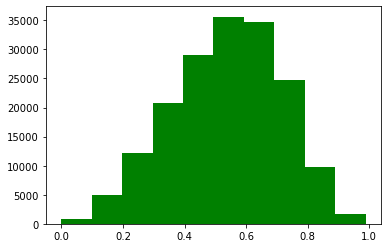

In [167]:
# pdf
plt.hist(danceability, color='g')

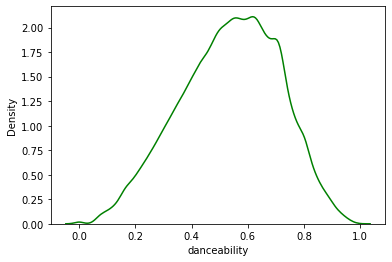

In [168]:
# estimated pdf by Gaussian kernel
sb.kdeplot(danceability, color='g', bw_adjust=1)
plt.show()

In [172]:
f=[]
for ai in np.arange(0,1,0.1):
    f.append(len([1 for i in danceability if i <ai]))

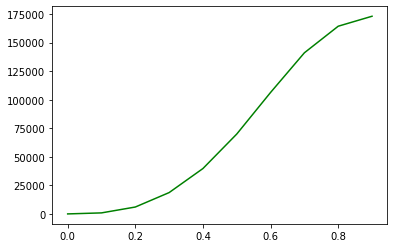

In [174]:
# (integral func) cumulative distribution function
plt.plot(np.arange(0,1,0.1),f, color='g')
plt.show()

<AxesSubplot:xlabel='danceability', ylabel='Density'>

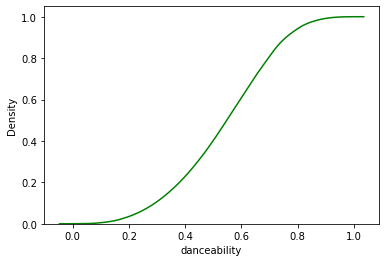

In [178]:
# Estimate the cumulative distribution function(s), normalizing #each subset:
sb.kdeplot(
    data=danceability,
    cumulative=True, common_norm=False, common_grid=True, color='g',)

# Calculating statistics

In [106]:
import statistics

# average
avg_danceability = sum(danceability)/len(danceability)
#statistics.mean(danceability)

# median 
sorted_danceability = sorted(danceability)
if len(danceability)%2 == 1: # odd
    middle =int((len(danceability) / 2) + 0.5)
    median_danceability = sorted_danceability[middle]
else:
    middle1 =int(len(danceability) / 2)
    middle2 = int((len(danceability) / 2)+1)
    median_danceability = (sorted_danceability[middle1]+sorted_danceability[middle2])/2
#statistics.median(danceability)  

# mode
mode_danceability =statistics.mode(danceability)

In [108]:
pd.DataFrame([['average',avg_danceability],
              ['median', median_danceability],
              ['mode', mode_danceability]],
             columns=['statistic','value'],
             )

,statistic,value
0,average,0.536758
1,median,0.548000
2,mode,0.565000


In [210]:
# quantiles
firstq = np.quantile(danceability, 0.25)
thirdq = np.quantile(danceability, 0.75)

In [211]:
# interquartile range
iqr = thirdq- firstq
import scipy
iqr_scipy = scipy.stats.iqr(danceability)
print(iqr, iqr_scipy)

0.25500000000000006 0.25500000000000006


In [214]:
# Sample Varience
varience = np.var(danceability, ddof = 1)
varience

0.030984890286678803

In [215]:
# Standard deviation
np.sqrt(np.var(danceability, ddof = 1))

0.1760252546843174

# correlation
tests

In [217]:
instrumentalness = data['instrumentalness']

In [218]:
from scipy.stats.stats import pearsonr
pearsonr(danceability,  instrumentalness)

(-0.21558894814635113, 0.0)

In [227]:
o = [2, 4, 6, 8, 10]
k= [-i-2 for i in o]
k

[-4, -6, -8, -10, -12]

In [228]:
pearsonr(o,  k)

(-1.0, 0.0)

# another data for plotting

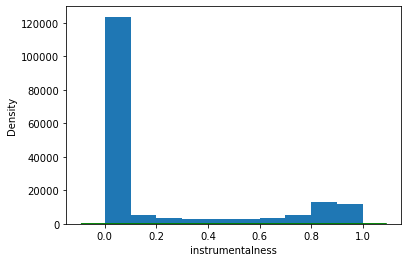

In [229]:
plt.hist(instrumentalness)
plt.show()

<AxesSubplot:xlabel='instrumentalness', ylabel='Density'>

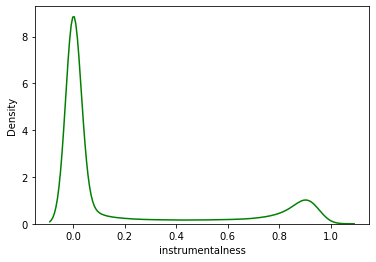

In [230]:
sb.kdeplot(instrumentalness, color='g', bw_adjust=1)

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


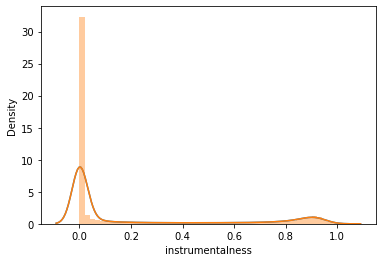

In [111]:
sb.displot(instrumentalness,hist=False)
sb.distplot(instrumentalness)
plt.show()

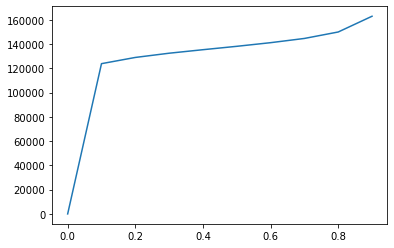

In [60]:
f = []
for ai in np.arange(0, 1, 0.1):
    f.append(len([1 for i in instrumentalness if i < ai]))
    
plt.plot(np.arange(0,1, 0.1), f)

<AxesSubplot:xlabel='instrumentalness', ylabel='Density'>

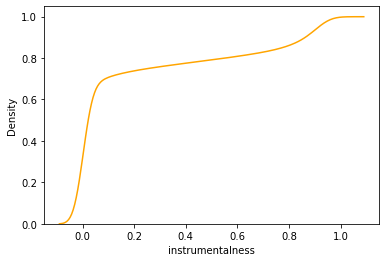

In [182]:
sb.kdeplot(
    data=instrumentalness,
    cumulative=True, common_norm=False, common_grid=True, color='Orange',)